# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [5]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].unique())
print(mice_count)

249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicate_mice['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = combined_df[combined_df['Mouse ID'] == 'g989']
g989_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df.drop(g989_data.index)
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(clean_data["Mouse ID"].unique())
print(mice_count)

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Create a grouped dataframe by Drug Regimen
drug_regimen = combined_df.groupby('Drug Regimen')
mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
var = drug_regimen['Tumor Volume (mm3)'].var()
std = drug_regimen['Tumor Volume (mm3)'].std()
sem = drug_regimen['Tumor Volume (mm3)'].sem()

drug_regimen = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': var, 'Tumor Volume Standard Deviation': std, 'Tumor Volume Standard Error': sem})
drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': var, 'Tumor Volume Standard Deviation': std, 'Tumor Volume Standard Error': sem})
drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

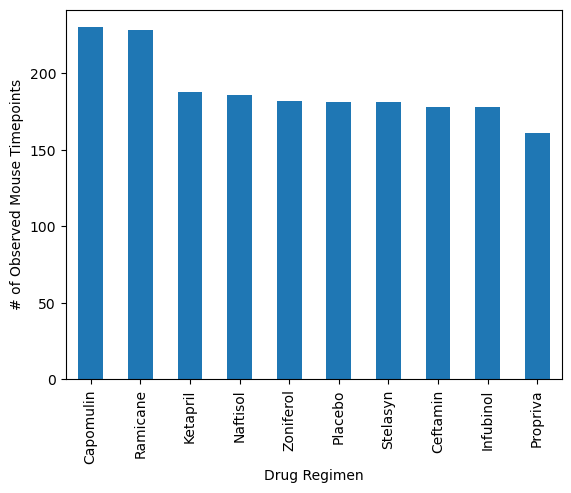

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = combined_df.groupby('Drug Regimen').size()
drug_count = drug_count.sort_values(ascending=False)

# Plot the bar chart using Pandas plot function
drug_count.plot(kind='bar', width=0.5)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

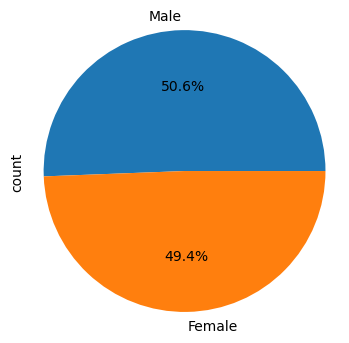

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = combined_df['Sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
plt.axis('equal')
plt.show()

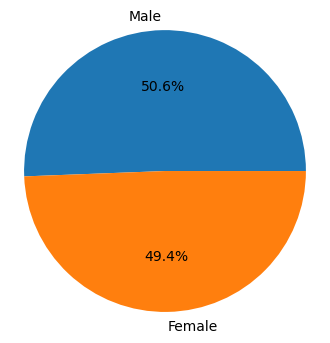

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Count the number of unique mice for each sex
sex_distribution = combined_df['Sex'].value_counts()

# Define labels for the pie chart
labels = sex_distribution.index

# Define sizes for the pie chart
sizes = sex_distribution.values

# Plot the pie chart using pyplot
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume = clean_data.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max = pd.merge(final_tumor_volume, combined_df, on=['Mouse ID', 'Timepoint'])
merged_max

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...,...
243,q633,45,70.827796,70.827796,2,Zoniferol,Male,12,25
244,s337,45,62.109651,62.109651,4,Zoniferol,Male,14,27
245,w140,5,47.717952,47.717952,0,Zoniferol,Female,19,30
246,w575,45,68.401286,68.401286,3,Zoniferol,Female,16,28


In [42]:
drug_regimens = merged_max['Drug Regimen'].unique()

tumor_volumes = {regimen: [] for regimen in drug_regimens}

for regimen in drug_regimens:
    tumor_volumes[regimen] = merged_max.loc[merged_max['Drug Regimen'] == regimen, 'Tumor Volume (mm3)_x']

for regimen in drug_regimens:
    volumes = tumor_volumes[regimen]
    
    quartiles = volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    potential_outliers = volumes[(volumes < lower_bound) | (volumes > upper_bound)]

    print(f"{regimen}'s potential outliers: {potential_outliers.values}")

Capomulin's potential outliers: []
Ceftamin's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ketapril's potential outliers: []
Naftisol's potential outliers: []
Placebo's potential outliers: []
Propriva's potential outliers: []
Ramicane's potential outliers: []
Stelasyn's potential outliers: []
Zoniferol's potential outliers: []


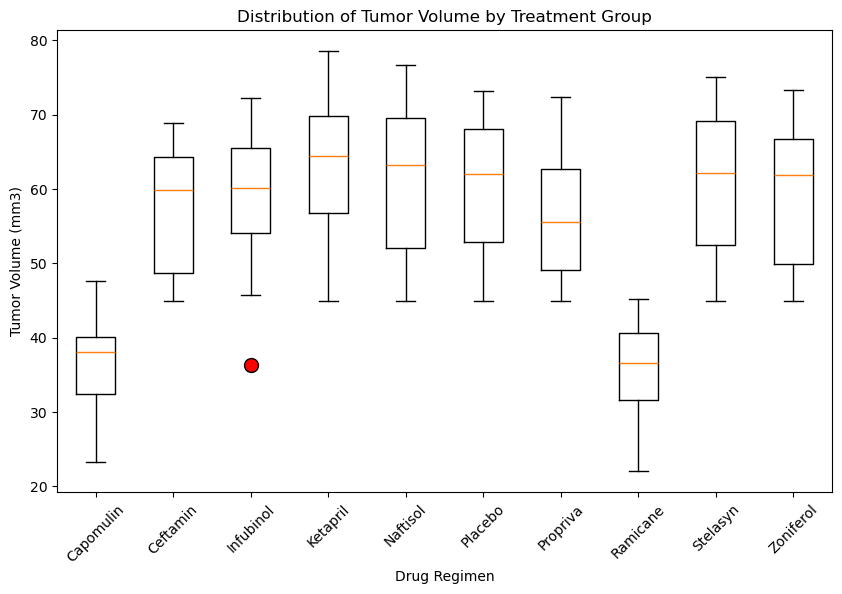

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
groups = merged_max.groupby('Drug Regimen')['Tumor Volume (mm3)_x'].apply(list)

tumor_volumes = [v for v in groups]

fig1, tumor = plt.subplots(figsize=(10, 6))

tumor.boxplot(tumor_volumes, labels=drug_regimens, flierprops={'markerfacecolor':'r', 'markersize': 10})

tumor.set_xticks(range(1, len(groups.index) + 1))
tumor.set_xticklabels(groups.index)

tumor.set_title('Distribution of Tumor Volume by Treatment Group')
tumor.set_xlabel('Drug Regimen')
tumor.set_ylabel('Tumor Volume (mm3)')

plt.xticks(rotation=45) 

plt.show()

## Line and Scatter Plots

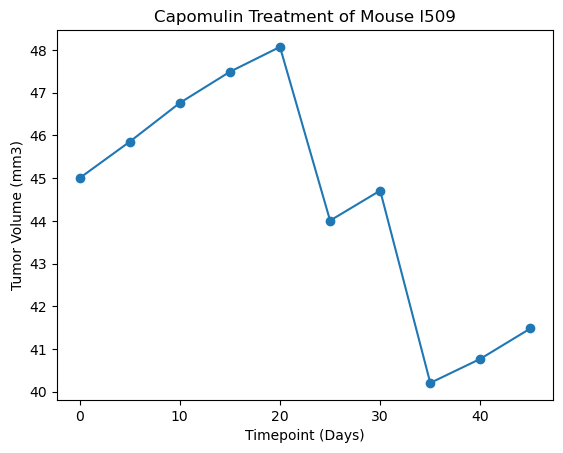

In [59]:
Capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = Capomulin.loc[Capomulin['Mouse ID'] == mouse_id]

mouse_df

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o', linestyle='-')

plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

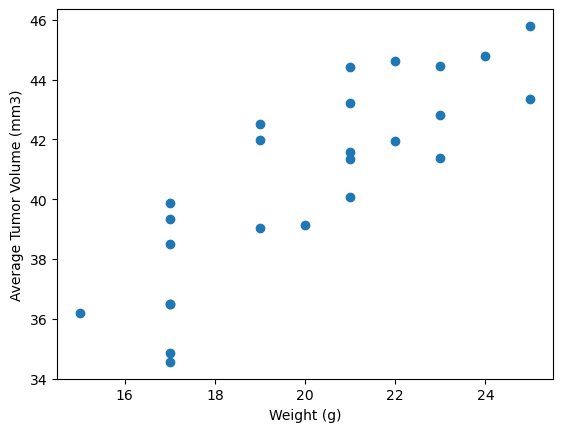

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_scatter = Capomulin.groupby('Mouse ID').mean(numeric_only=True)
average_weight = Capomulin_scatter['Weight (g)']
average_tumor = Capomulin_scatter['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(average_weight, average_tumor)

# Set x/y label, title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


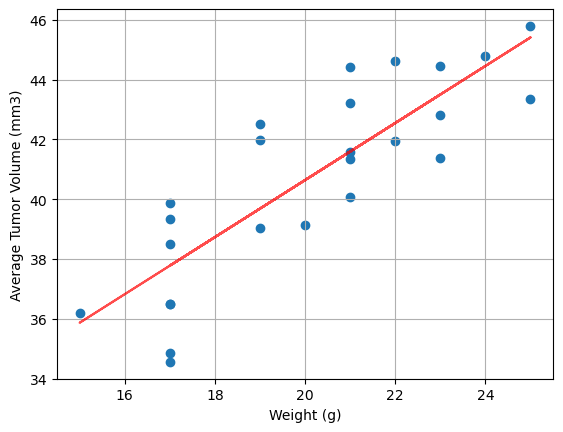

In [76]:
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume and weight for each mouse
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Calculate the correlation coefficient between weight and average tumor volume
average_weight = grouped_data['Weight (g)']
average_tumor = grouped_data['Tumor Volume (mm3)']
correlation = round(st.pearsonr(average_weight, average_tumor)[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

# Fit a linear regression model to the data
slope, intercept, *_ = st.linregress(average_weight, average_tumor)
regress = average_weight * slope + intercept

# Plot the scatter plot and the linear regression line
plt.scatter(average_weight, average_tumor)
plt.plot(average_weight, regress, color='r', alpha=0.7)

# Set x/y label, title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.grid(True)
plt.show()